# Classification Intro
## Types of Classification
### Binary Classification
`is this A or B?`,  `SPAM or NOT SPAM?`

### Multi-Class Classification
`Is this pizza, steak, or sushi?` `Is this a 1 or a 9?` 

### Multi-Label Classification
`What tags/labels should this article get?`  

## Topics To Consider With Classification Models
- the architecture of a neural network
- Input & Output shapes
  - photos of food to identified foods 
- Steps in modeling (creating, compiling, fitting, and evaluationg)
- Evaluation methods
- saving + loading a model

## Classification Example: Photo-to-food
### The Overview
- photos are (square) pixels
- photos have dimensions, say 256x256
- photos have pixels with colors, say rgb strings
- the pixels can be broken down into numbers based on img pixel coordinates
- the pixel numbers can be converted to tensors
- the tensors can get passed to models....etc

### The Inputs & Outputs
Pixels get converted to tensors & passed to machine learning models.  
Inputs could look like...
- `[batch_size, img_width, img_height, colour_channels]`
Outputs could look like...
- `[%likeSushi, %likeSteak, %likePotatos, ...etc]`

## Architecture of A Classification model
A Classification model could...
- be a sequential model
- contain several layers
  - an Input layer with a defined shape
  - an activiation-specified set of "inner" layers
  - a "softmax" final layer

### Classification Model Details & Hyperparameters
- **Input Layer Shape**: same as the number of features
- **Hidden Layers**: Problem-specific (_minimum 1 & maximum unlimited..._)
- **Neuros-Per-Hidden-Layer**: Problem-specific (generally 10-100)
- **Output layer shape**: 1-per-classification
- **Hidden Activation**: usually ReLu (rectified linear unit)
- **Output Activation**: usually softmax for multi-class or sigmoid for binary class
- **Loss Function**: Cross Entropy (categorical or binary)
- **Optimizer**: SGD or Adam

## A Mock Classification Example
### Make Some Data

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# make_circles:
# A simple toy dataset to visualize clustering and classification algorithms.
# returns X as array of numbers
# returns y as binary classification options

# how much data
sampleCount = 1000
X, y = make_circles(sampleCount, noise=0.03, random_state=42)


# convert to pd datafram
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### Visualize the data

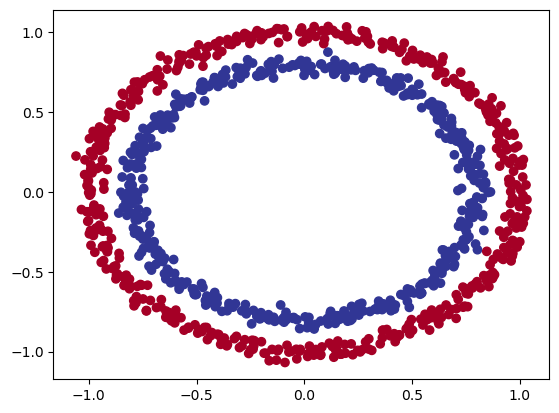

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Inspect Data Shapes

In [3]:
print(f'data SHAPES --> X: {X.shape}, Y: {y.shape}')
print(f'data LENGTHS --> X: {len(X)}, Y: {len(y)}')

data SHAPES --> X: (1000, 2), Y: (1000,)
data LENGTHS --> X: 1000, Y: 1000


In [4]:
X[0]

array([0.75424625, 0.23148074])

In [5]:
y[0]

1

### Model: Creation, Compilation, & Fit

In [6]:
tf.random.set_seed(42)
l1 = tf.keras.layers.Dense(1)
m1EpochCount = 5

# Create
m1 = tf.keras.Sequential()
m1.add(l1)

# Compile
m1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# Fit
m1.fit(X, y, epochs=m1EpochCount)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 2.7703 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.5320
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6965 - accuracy: 0.5160
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4900


### Model: More Epochs
The previous run looks like the accuracy is `~50%`. That's pretty bad.  

In [7]:
moreEpochs = 200
m1.fit(X, y, epochs=moreEpochs, verbose=0)

In [8]:
m1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

### Model: Add Another Layer
Looks like more epochs did NOT make a meaningful impact.

In [9]:
midEpochs = 100
m2 = tf.keras.Sequential()
m2.add(l1)
m2.add(l1)
m2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
m2.fit(X, y, epochs=midEpochs, verbose=0)

In [10]:
m2.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

Looks like MORE LAYERS didn't really help either: the accuracy is still `~50%`.

### Models: Ways To Update
- add layers
- increase the number of hidden units
- change the activation function
- change the optimization function
- change the learning rate
- fit more data
- fit for longer

### Models: Add Layer Hidden Units

In [11]:
m3 = tf.keras.Sequential()
dense100 = tf.keras.layers.Dense(100)
dense10 = tf.keras.layers.Dense(10)
dense1 = tf.keras.layers.Dense(1)

m3.add(dense100)
m3.add(dense10)
m3.add(dense1)

m3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
m3.fit(X,y,epochs=100, verbose=0)

In [12]:
m3.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6997 - accuracy: 0.5000


[0.6997056007385254, 0.5]

Still no meaningful updates :(

### Model: Visualize Predictions
Create a reusable function that takes the `model`, the `x` & the `y` input and uses matplotlib to draw a chart

In [13]:
def plot_decision_boundary(model, X, y):
  """
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  #
  # Define the axis boundaries of the plot and create a meshgrid
  #
  x_axis_min, x_axis_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_axis_min, y_axis_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  axis_points = np.linspace(x_axis_min, x_axis_max, 100)
  xx, yy = np.meshgrid(axis_points,axis_points)
  
  #
  # Create X values (we're going to predict on all of these)
  #
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  #
  # Make predictions using the trained model
  #    
  y_pred = model.predict(x_in)

  #
  # Check for multi-class
  #
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #
  # Plot decision boundary
  #
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


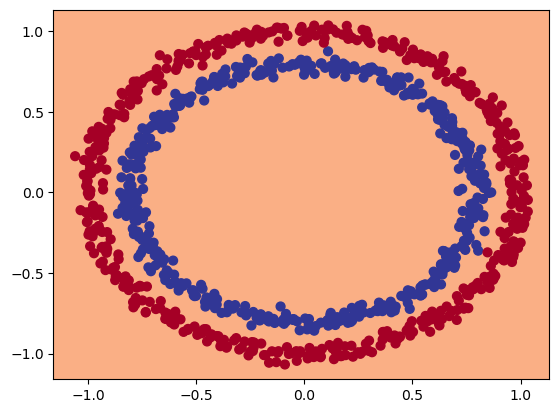

In [14]:
plot_decision_boundary(m3, X, y)

### Model: Several updates
- 2x dense layer with 4 neurons with relu activation
- output layer with 1 neuron, sigmoid activation
- learning-rate of .001

In [15]:
denseRelu4 = tf.keras.layers.Dense(4, activation="relu")
denseSigmoid1 = tf.keras.layers.Dense(1, activation="sigmoid")
tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
# Create a model
m5 = tf.keras.Sequential()
m5.add(denseRelu4)
m5.add(denseRelu4)
m5.add(denseSigmoid1)

# Compile the model
m5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
m5History = m5.fit(X, y, epochs=100, verbose=0)

In [16]:
m5.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6739 - accuracy: 0.6160


[0.6738939881324768, 0.6159999966621399]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


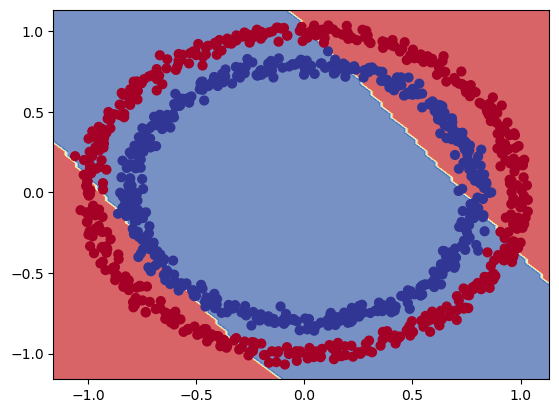

In [17]:
plot_decision_boundary(m5, X, y)

### Model: Change Optimizer Learning Rate

In [18]:
# testDataPercentage = .15 # how much of our data should we use for "testing"
# randomVal = 42
# feature_training_data, feature_testing_data, label_training_data, label_testing_data = train_test_split(X, 
#                                                     y, 
#                                                     test_size=testDataPercentage, 
#                                                     random_state=randomVal) # set random state for reproducible splits


# Split data into train and test sets
feature_training_data, label_training_data = X[:800], y[:800] # 80% of the data for the training set
feature_testing_data, label_testing_data = X[800:], y[800:] # 20% of the data for the test set

In [22]:
m6 = tf.keras.Sequential()
m6.add(denseRelu4)
m6.add(denseRelu4)
m6.add(denseSigmoid1)

# Compile the model
m6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
m6History = m6.fit(feature_training_data, label_training_data, epochs=30, verbose=0)

In [23]:
loss, accuracy = m6.evaluate(feature_testing_data, label_testing_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.3997 - accuracy: 0.8050
Model loss on the test set: 0.39969173073768616
Model accuracy on the test set: 80.50%


313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


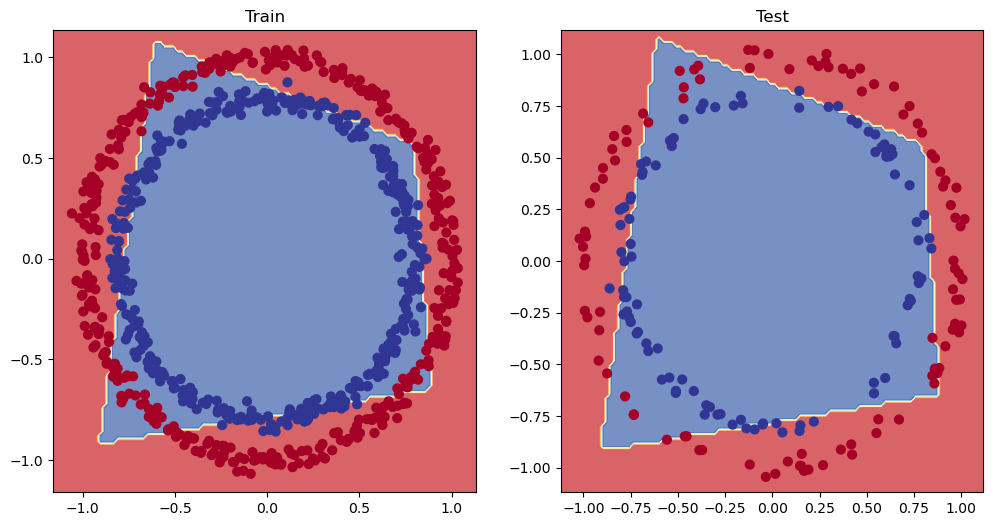

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m6, X=feature_training_data, y=label_training_data)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m6, X=feature_testing_data, y=label_testing_data)
plt.show()

## More Model Analysis
### Plot The Loss Curve

In [25]:
pd.DataFrame(m6History.history)

,loss,accuracy
0,0.466819,0.78750
1,0.465042,0.79625
2,0.460978,0.79500
3,0.461667,0.80125
4,0.457321,0.79125
5,0.455340,0.78000
6,0.452913,0.79875
7,0.453253,0.79125
8,0.449769,0.80125
9,0.447327,0.80375


Text(0.5, 1.0, 'm6 training curves')

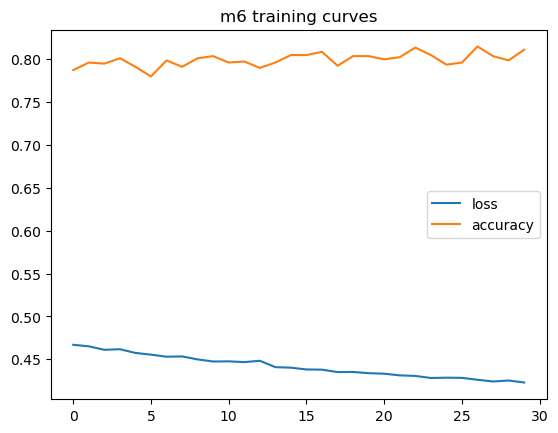

In [28]:
pd.DataFrame(m6History.history).plot()
plt.title("m6 training curves")

### Find The Best Learning Rate
Playing around with the learning rate can be part of experimenting with machine learning.  
A learning-rate **callback function** can be used to find the best learning rate:

In [29]:
tf.random.set_seed(42)

# Create a model (same as model_8)
m7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
m7.compile(loss="binary_crossentropy",
           # tf.keras.optimizers.Adam()
           optimizer="Adam",
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
m7History = m7.fit(feature_training_data,
                      label_training_data,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 6ms/step - loss: 0.6980 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

### Visualize The Model Performance
Visualizing _by epoch_...
- **loss**: how much error is happening between "guessed" output and "real" output, per-epoch. An ideal would be to see a downward slop from beginning to end
- **accuracy**: how accurate the model is per-epoch. An ideal would be to see an increase over time
- **learning-rate (lr)**: how "fast" the model is learning, per-epoch. An ideal here could be to see a "hockey stick", increasing learning-rate over time

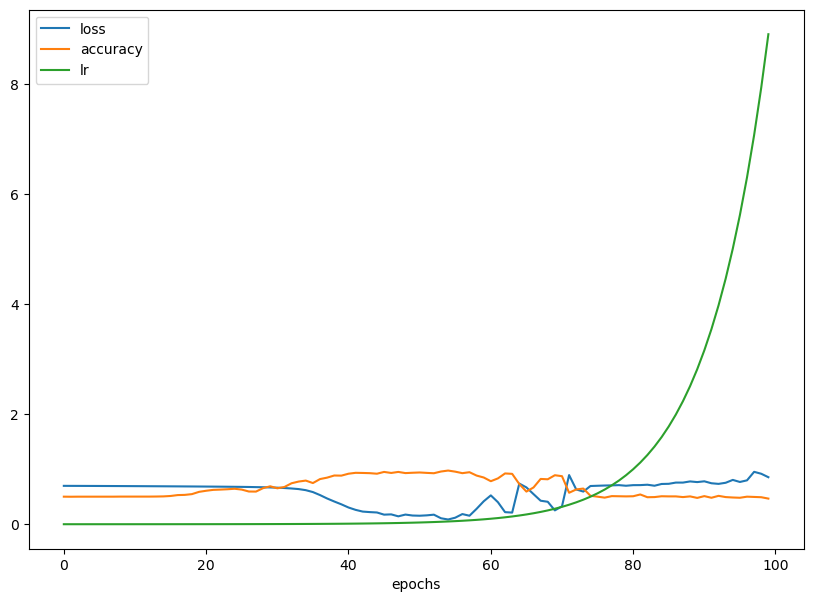

In [30]:
pd.DataFrame(m7History.history).plot(figsize=(10,7), xlabel="epochs");

### Visualize Loss Vs Learning
Loss vs. learning can be super critical for "finding" the "ideal" learning-rate.  
The LEAST loss means the best guess.  
The learning-rate that "intersects" with the least loss is, potentially, the "best" learning-rate.  

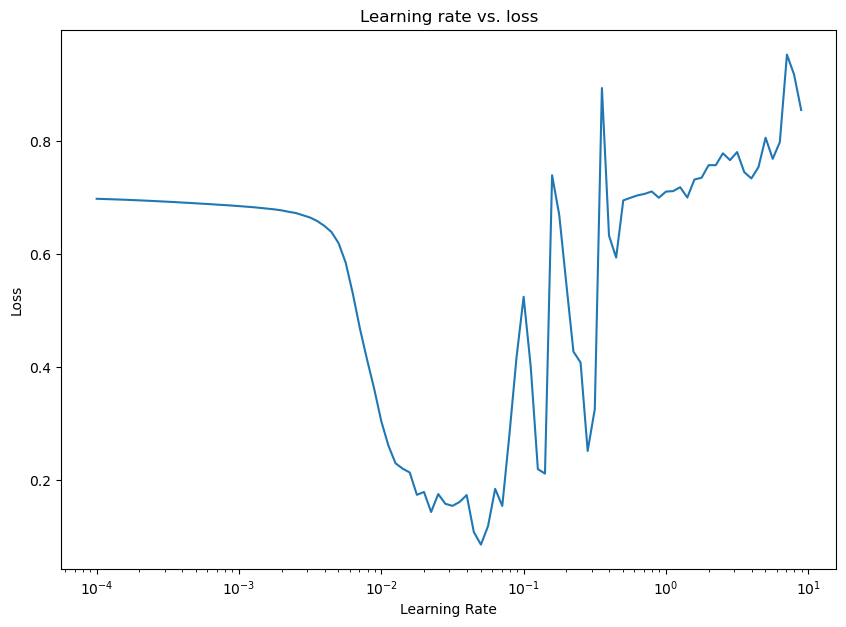

In [32]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, m7History.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [34]:
# using 10 exp -2 (.01), lets try using .02

# Create the model
m8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
m8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
m8History = m8.fit(feature_training_data, label_training_data, epochs=30)

Epoch 1/30
25/25 [==============================] - 2s 5ms/step - loss: 0.6899 - accuracy: 0.5412
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.5475
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.5775
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6413 - accuracy: 0.6550
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.6925
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 0.7688
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7500
Epoch 8/30
25/25 [==============================] - 0s 5ms/step - loss: 0.4720 - accuracy: 0.8025
Epoch 9/30
25/25 [==============================] - 0s 5ms/step - loss: 0.4181 - accuracy: 0.8263
Epoch 10/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3984 - accuracy: 0.8350
Epoch 11/30
25/25 [

In [35]:
m8.evaluate(feature_training_data, label_training_data)

25/25 [==============================] - 1s 6ms/step - loss: 0.0813 - accuracy: 0.9688


[0.08127958327531815, 0.96875]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


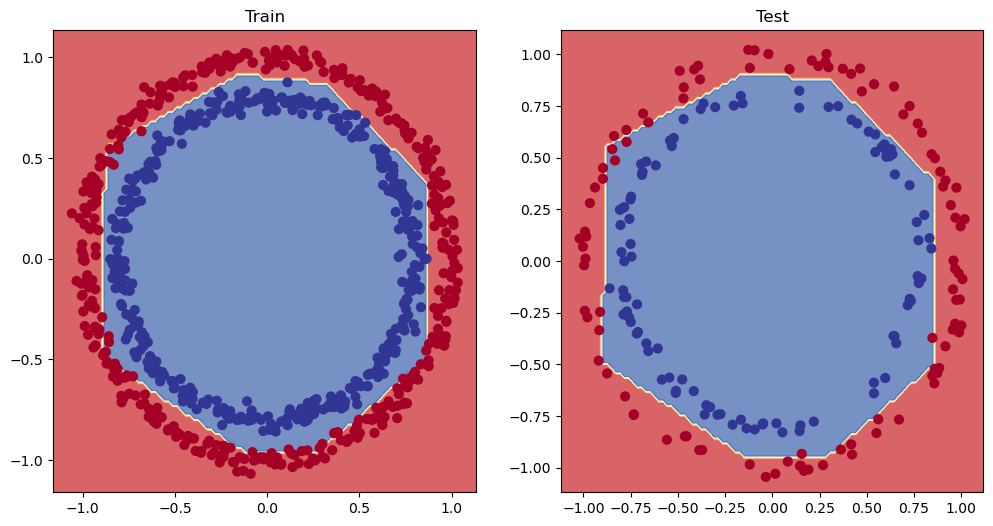

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(m8, X=feature_training_data, y=label_training_data)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(m8, X=feature_testing_data, y=label_testing_data)
plt.show()